In [1]:
import os
import glob
import time
import json

import networkx as nx
import math

## Setup Plot Settings

In [2]:
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

# Data Paths

In [56]:
data_path = "/DATA/7A/assets/erc20networks/UniswapV2/"

graph_name = "UniswapV2"

In [57]:
with open(data_path + graph_name + '.json') as f:
    graph_info = json.load(f)
graph_info['name'], graph_info['#nodes'], graph_info['#edges']

('Uniswap V2', 275273, 4218841)

# Create NetworkX Graph

In [58]:
#create multidigraph
edges = graph_info["edges"]

graph = nx.MultiDiGraph()
for e in edges:
    u = e[0]
    v = e[1]
    t = e[2]
    graph.add_edge(u, v, timestamp=t)

nx.info(graph)

'Name: \nType: MultiDiGraph\nNumber of nodes: 275273\nNumber of edges: 4218841\nAverage in degree:  15.3260\nAverage out degree:  15.3260'

### get gephi output

In [17]:
# Export to Gexf file.
nx.write_gexf(graph, '{}'.format(data_path + graph_name + ".gexf"))

KeyboardInterrupt: 

## create network snapshots

In [59]:
time_period = 60*60*24*90 # 90 day periods

mindelta = edges[0][2]
maxdelta = edges[0][2]
for e in edges:
    if e[2] > maxdelta:
        maxdelta = e[2]
    if e[2] < mindelta:
        mindelta = e[2]
print(mindelta, maxdelta)
duration = maxdelta - mindelta
num_snapshots = math.ceil(duration / time_period)
print("Number of snapshots", num_snapshots)

graphs = []
for x in range(0,num_snapshots):
    #tg = nx.MultiDiGraph()
    #tg["name"] = str(x)
    graphs.append(nx.MultiDiGraph())
    

for u,v,t in graph.edges(data=True):
    idx = math.floor((t["timestamp"] - mindelta) / time_period)
    graphs[idx].add_edge(u, v)
    
for g in graphs:
    print(nx.info(g))

1587496411 1615234784
Number of snapshots 4
Name: 
Type: MultiDiGraph
Number of nodes: 14357
Number of edges: 80574
Average in degree:   5.6122
Average out degree:   5.6122
Name: 
Type: MultiDiGraph
Number of nodes: 135257
Number of edges: 1997916
Average in degree:  14.7713
Average out degree:  14.7713
Name: 
Type: MultiDiGraph
Number of nodes: 149423
Number of edges: 1578768
Average in degree:  10.5658
Average out degree:  10.5658
Name: 
Type: MultiDiGraph
Number of nodes: 89063
Number of edges: 561583
Average in degree:   6.3055
Average out degree:   6.3055


# Analysis

In [60]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

## hub vertices

- which tokens share hubs? (if they share any)

- can we find liquidity providers by checking neighbors of hub vertices?


In [61]:
degrees = graph.degree
print("All time:")
print(sorted(degrees, key=lambda t: t[1], reverse=True)[:5])
c = 0
for g in graphs:
    print("T =", c)
    c += 1
    print(sorted(g.degree, key=lambda t: t[1], reverse=True)[:5])

All time:
[('0x0000000000000000000000000000000000000000', 1825213), ('0xc2edad668740f1aa35e4d8f227fb8e17dca888cd', 156513), ('0xbd17b1ce622d73bd438b9e658aca5996dc394b0d', 47948), ('0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852', 46251), ('0xa478c2975ab1ea89e8196811f51a7b7ade33eb11', 45438)]
T = 0
[('0x0000000000000000000000000000000000000000', 52797), ('0xe0624ab7206b847713b03f17602836205593497c', 3860), ('0xc5be99a02c6857f9eac67bbce58df5572498f40c', 3329), ('0xce12d91c92f6fabe640c49d5f61c6715b0f5c034', 3051), ('0x379b4609bdf93b3584cf7b64bc78199cf185f1cd', 2724)]
T = 1
[('0x0000000000000000000000000000000000000000', 806145), ('0xc2edad668740f1aa35e4d8f227fb8e17dca888cd', 156508), ('0x9dd5b5c71842a4fd51533532e5470298bfa398fd', 40001), ('0x1daed74ed1dd7c9dabbe51361ac90a69d851234d', 38708), ('0xbd17b1ce622d73bd438b9e658aca5996dc394b0d', 37839)]
T = 2
[('0x0000000000000000000000000000000000000000', 706848), ('0x067d4d3ce63450e74f880f86b5b52ea3edf9db0f', 21296), ('0xa478c2975ab1ea89e8196811f51

## degree distribution

- is there a difference between erc20 and erc721 degree distributions?
- user profiling => degree distribution of users across graphs 
- user activity profiling => temporal degree distribution 
    - for diffent time granularities

Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...


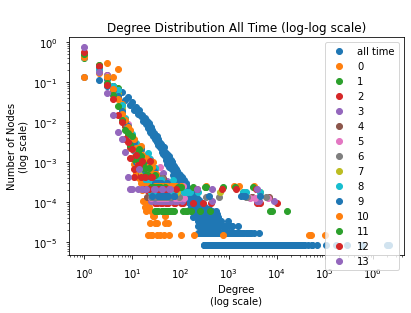

In [15]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

x, y = plot_degree_histogram(graph)
plt.title('\nDegree Distribution All Time (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(x, y, 'o', label = "all time")

c = 0
for g in graphs:
    x, y = plot_degree_histogram(g)
    plt.plot(x, y, 'o', label=c)
    c += 1
plt.legend()

- degree distribution could show us whales in marketplaces?
- nft galleries? :)
    
**Degree distribution at a **

- degree distribution change 

# pdf

powerlaw package
fit a power law curve
how th exponent is changing over time

* cdf of the data

In [62]:
degrees = graph.degree
data = [i[1] for i in degrees]
fit = powerlaw.Fit(data)
print(fit.power_law.alpha)
print(fit.power_law.sigma)
fit.distribution_compare('power_law', 'lognormal_positive')

Calculating best minimal value for power law fit
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


2.144232167343958
0.012980865299980913


(70.58341268147171, 4.477940097298664e-08)

In [63]:
for g in graphs:
    degrees = g.degree
    data = [i[1] for i in degrees]
    fit = powerlaw.Fit(data)
    print(fit.power_law.alpha)
    print(fit.power_law.sigma)
    print(fit.distribution_compare('power_law', 'exponential'))

Calculating best minimal value for power law fit
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


2.4845476901158188
0.03162910514750986
(3447.303506044963, 0.000828415915451619)


Calculating best minimal value for power law fit


2.214593600589973
0.014364085042357276
(8955.054538288623, 5.85573358951551e-05)


Calculating best minimal value for power law fit


2.131005347897383
0.011570425032106563
(11151.282454154263, 0.0004997259874951886)
2.2110902912838446
0.01364484273033463
(10048.586909117865, 0.00024103998489212195)


Calculating best minimal value for power law fit


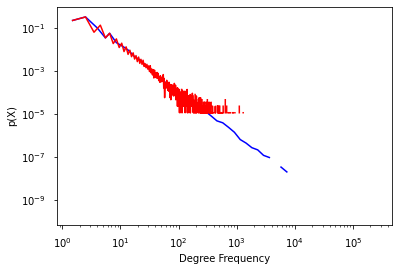

In [64]:
figPDF = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)

figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Degree Frequency")
figname = 'Degree Distribution'

In [65]:
def plot_basics(data, data_inst, fig, units):
    from powerlaw import plot_pdf, Fit, pdf
    annotate_coord = (-.4, .95)
    ax1 = fig.add_subplot(n_graphs,n_data,data_inst)
    x, y = pdf(data, linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]
    ax1.scatter(x, y, color='r', s=.5)
    #plot_pdf(data[data>0], ax=ax1, color='b', linewidth=2)
    plot_pdf(data, ax=ax1, color='b', linewidth=2)
    from pylab import setp
    setp( ax1.get_xticklabels(), visible=False)

    if data_inst==1:
        ax1.annotate("A", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    
    from mpl_toolkits.axes_grid.inset_locator import inset_axes
    ax1in = inset_axes(ax1, width = "30%", height = "30%", loc=3)
    ax1in.set_xticks([])
    ax1in.set_yticks([])

    
    ax2 = fig.add_subplot(n_graphs,n_data,n_data+data_inst, sharex=ax1)
    plot_pdf(data, ax=ax2, color='b', linewidth=2)
    fit = Fit(data, xmin=1, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle=':', color='g')
    p = fit.power_law.pdf()

    ax2.set_xlim(ax1.get_xlim())
    
    fit = Fit(data, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle='--', color='g')
    from pylab import setp
    setp( ax2.get_xticklabels(), visible=False)

    if data_inst==1:
       ax2.annotate("B", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)        
       ax2.set_ylabel(u"p(X)")# (10^n)")
        
    ax3 = fig.add_subplot(n_graphs,n_data,n_data*2+data_inst)#, sharex=ax1)#, sharey=ax2)
    fit.power_law.plot_pdf(ax=ax3, linestyle='--', color='g')
    fit.exponential.plot_pdf(ax=ax3, linestyle='--', color='r')
    fit.lognormal.plot_pdf(ax=ax3, linestyle='--', color='b')
        fit.lognormal.plot_pdf(ax=ax3, linestyle='--', color='b')
    fit.plot_pdf(ax=ax3, color='b', linewidth=2)
    
    ax3.set_ylim(ax2.get_ylim())
    ax3.set_xlim(ax1.get_xlim())
    
    if data_inst==1:
        ax3.annotate("C", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    ax3.set_xlabel(units)

/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:1560: RuntimeWarning: invalid value encountered in true_divide
  return likelihoods/norm
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/aakyi

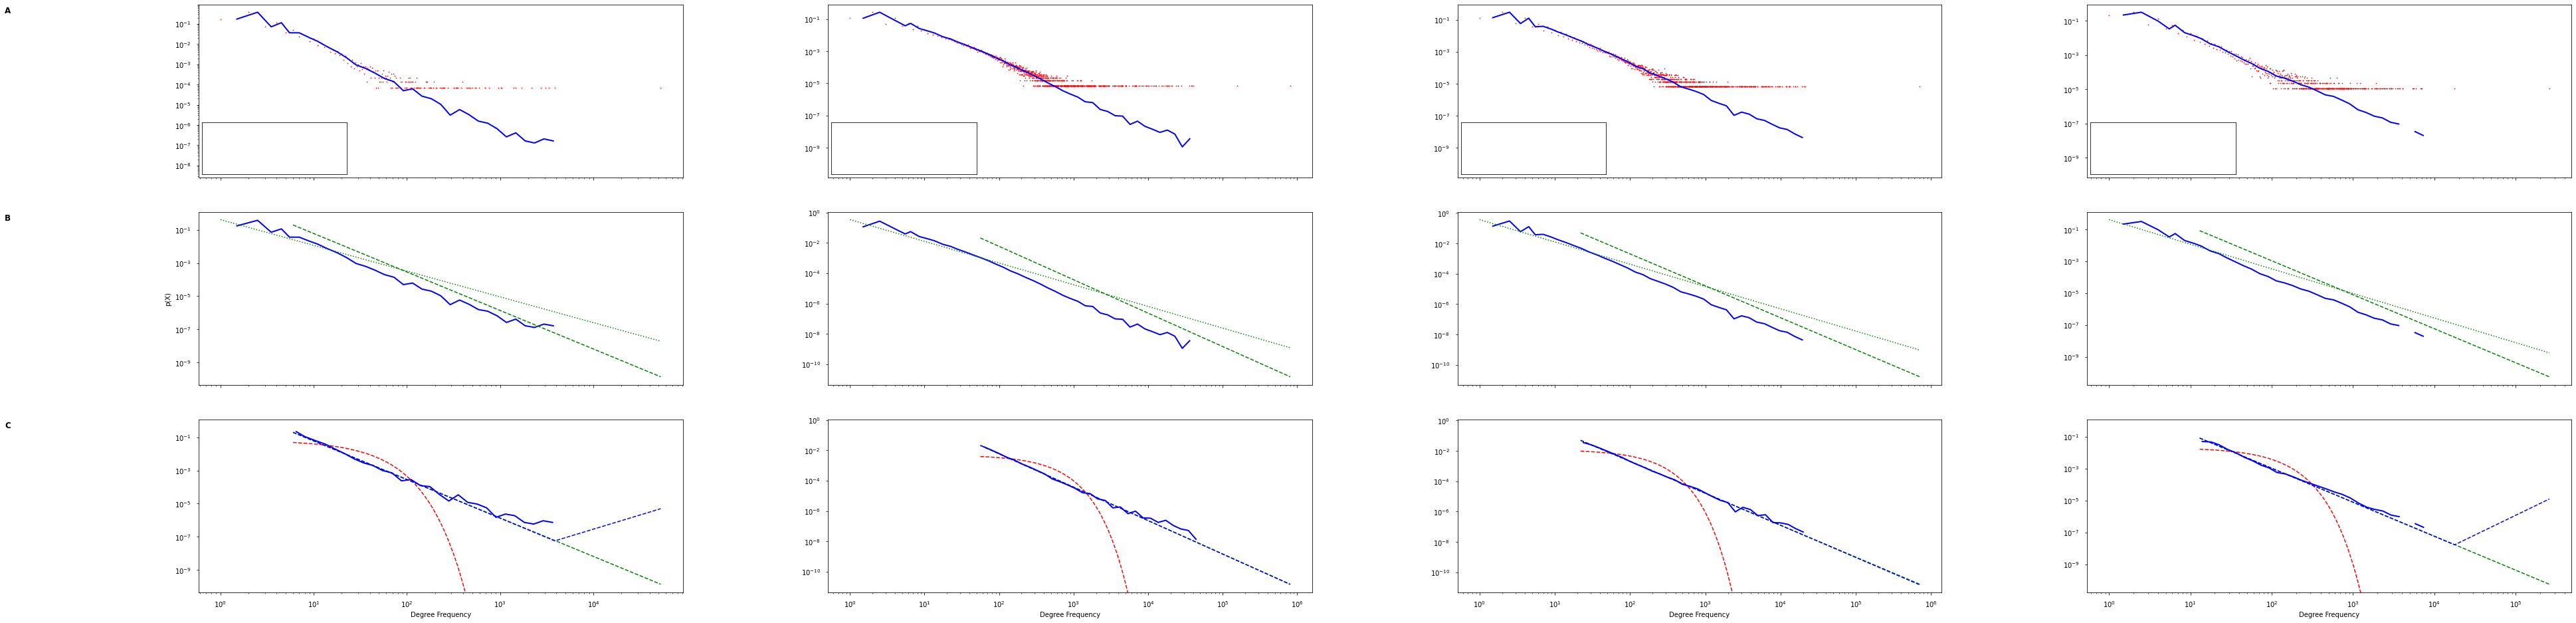

In [68]:
n_data = len(graphs)
n_graphs = 4
f = plt.figure(figsize=(64,22))

data_inst = 1
for g in graphs:
    degrees = g.degree
    data = [i[1] for i in degrees]
    units = 'Degree Frequency'
    plot_basics(data, data_inst, f, units)
    data_inst += 1

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
figname = 'FigWorkflow'
f.savefig(figname+'.png', bbox_inches='tight')
#f.savefig(figname+'.tiff', bbox_inches='tight', dpi=300)